# IMDB Reviews classification using Recurrent Neural Networks

In [1]:
from keras.datasets import imdb

In [2]:
((XT,YT),(xt,yt)) = imdb.load_data(num_words=10000)

In [3]:
#word index from imdb
word_idx = imdb.get_word_index()

In [4]:
# index mapped to word imdb dict
idx_to_word = dict([val,key] for (key,val) in word_idx.items())

In [5]:
# converting into actual review
actual_review = ""
for idx in XT[0]:
    actual_review += idx_to_word.get(idx-3,'?') + ' '

In [6]:
actual_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [7]:
# # Create a 2D Tensor to be processed by the embedding layer
from keras.preprocessing import sequence
# pad sequence makes every sequence of equal length by adding 0 in start of every sequence untill 
#every sequence becomes equal to provided length or maxlength sequence

X_train = sequence.pad_sequences(XT,maxlen=500)
X_test = sequence.pad_sequences(xt,maxlen=500)

In [8]:
# Training the model

In [9]:
from keras.layers import Dense,Embedding,SimpleRNN
from keras.models import Sequential

In [10]:
model = Sequential()

In [11]:
model.add(Embedding(10000,64))
model.add(SimpleRNN(32))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          640000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                3104      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 643,137
Trainable params: 643,137
Non-trainable params: 0
_________________________________________________________________


In [12]:
# compiling the model
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

In [13]:
hist = model.fit(X_train,YT,validation_split=0.2,epochs=10,batch_size=128)

Epoch 1/10
157/157 [==============================] - 32s 194ms/step - loss: 0.6062 - acc: 0.6496 - val_loss: 0.7649 - val_acc: 0.6030
Epoch 2/10
157/157 [==============================] - 29s 186ms/step - loss: 0.3608 - acc: 0.8511 - val_loss: 0.4486 - val_acc: 0.7952
Epoch 3/10
157/157 [==============================] - 29s 186ms/step - loss: 0.2396 - acc: 0.9079 - val_loss: 0.3549 - val_acc: 0.8556
Epoch 4/10
157/157 [==============================] - 29s 188ms/step - loss: 0.1452 - acc: 0.9508 - val_loss: 0.4733 - val_acc: 0.7966
Epoch 5/10
157/157 [==============================] - 30s 188ms/step - loss: 0.0806 - acc: 0.9744 - val_loss: 0.4867 - val_acc: 0.8256
Epoch 6/10
157/157 [==============================] - 29s 185ms/step - loss: 0.0450 - acc: 0.9875 - val_loss: 0.5230 - val_acc: 0.8242
Epoch 7/10
157/157 [==============================] - 29s 187ms/step - loss: 0.0230 - acc: 0.9938 - val_loss: 0.5652 - val_acc: 0.8254
Epoch 8/10
157/157 [==============================] - 2

In [14]:
# plotting the model
import matplotlib.pyplot as plt

def plot_model(hist):
    acc = hist.history['acc']
    val_acc = hist.history['val_acc']
    
    loss = hist.history['loss']
    val_loss = hist.history['val_loss']
    
    epochs = range(1,len(loss)+1)
    
    plt.title('Training_Accuracy vs Validation_Accuracy')
    plt.plot(epochs,acc,label='Training Accuracy')
    plt.plot(epochs,val_acc,label='Valdation Accuracy')
    plt.legend()
    plt.show()
    
    plt.title('Training_Loss vs Validation_Loss')
    plt.plot(epochs,loss,label='Training Loss')
    plt.plot(epochs,val_loss,label='Valdation Loss')
    plt.legend()
    plt.show()

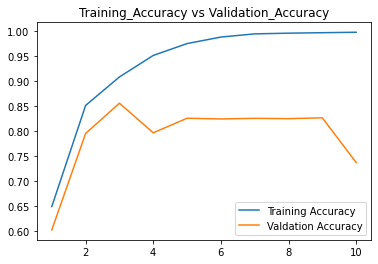

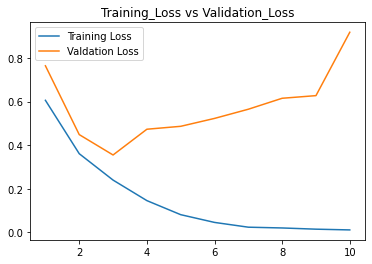

In [15]:
plot_model(hist)

In [16]:
# saving the model 
model.save("overfitting_model.h5")

## Here we can see that after certaing epochs validation loss started increasing and validation accuracy started decreasing whereas training loss and accuracy is decreasing and increasing respectively shows that model is overfitting

In [17]:
# To avoid overfitting using callbacks

In [18]:
from keras.callbacks import ModelCheckpoint # save the best model, fight overfiitting
from keras.callbacks import EarlyStopping #save time


checkpoint = ModelCheckpoint("best_model.h5", monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)
earlystop = EarlyStopping(monitor='val_acc',patience=1)

In [19]:
model2 = Sequential()
model2.add(Embedding(10000,64))
model2.add(SimpleRNN(32))
model2.add(Dense(1,activation='sigmoid'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          640000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                3104      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 643,137
Trainable params: 643,137
Non-trainable params: 0
_________________________________________________________________


In [20]:
model2.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

In [21]:
hist2= model2.fit(X_train,YT,validation_split=0.2,epochs=10,batch_size=128,callbacks=[checkpoint,earlystop])

Epoch 1/10
157/157 [==============================] - 19834s 127s/step - loss: 0.5432 - acc: 0.7247 - val_loss: 0.5357 - val_acc: 0.7296
Epoch 2/10
157/157 [==============================] - 32s 203ms/step - loss: 0.3412 - acc: 0.8626 - val_loss: 0.3412 - val_acc: 0.8616
Epoch 3/10
157/157 [==============================] - 31s 197ms/step - loss: 0.2437 - acc: 0.9056 - val_loss: 0.3314 - val_acc: 0.8654
Epoch 4/10
157/157 [==============================] - 30s 193ms/step - loss: 0.1746 - acc: 0.9346 - val_loss: 0.3414 - val_acc: 0.8782
Epoch 5/10
157/157 [==============================] - 31s 196ms/step - loss: 0.1130 - acc: 0.9613 - val_loss: 0.4397 - val_acc: 0.8272


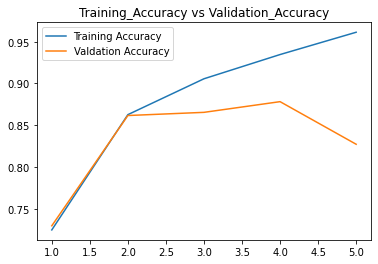

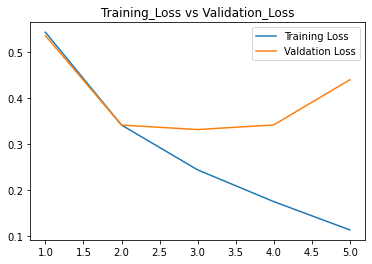

In [22]:
plot_model(hist2)

In [25]:
model2.load_weights('best_model.h5')

In [29]:
model2.evaluate(X_train,YT) #Training set evaluation on best model

782/782 [==============================] - 15s 19ms/step - loss: 0.1824 - acc: 0.9362


[0.18242822587490082, 0.936240017414093]

In [30]:
model2.evaluate(X_test,yt) # testing set evaluation on best model

782/782 [==============================] - 16s 21ms/step - loss: 0.3331 - acc: 0.8637


[0.33312398195266724, 0.8637199997901917]

## Here as you see we decreased the overfitting by u8sing earlystoppage or checkpoint call backs and saving the best model